## **Connecting to Kaggle and downloding the Dataset**



**Dataset Used : insurance_data.csv**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
!mkdir -p gdrive/MyDrive/insurance_claim_analysis

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/insurance_claim_analysis"

In [ ]:
%cd /content/gdrive/MyDrive/insurance_claim_analysis

/content/gdrive/MyDrive/insurance_claim_analysis


In [ ]:
from google.colab import files
files.upload()

In [ ]:
!ls

dataset  kaggle.json


In [ ]:
!pip install -q kaggle

In [ ]:
!kaggle datasets download -d thedevastator/insurance-claim-analysis-demographic-and-health

  0% 0.00/20.5k [00:00<?, ?B/s]
100% 20.5k/20.5k [00:00<00:00, 4.12MB/s]


In [ ]:
!unzip \*.zip  && rm *.zip

Archive:  insurance-claim-analysis-demographic-and-health.zip
  inflating: insurance_data.csv      


In [ ]:
!mkdir -p dataset

In [ ]:
!mv insurance_data.csv -t dataset

## **Import Modules**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

## **Understanding the data**

In [ ]:
df = pd.read_csv("dataset/insurance_data.csv")

In [ ]:
df.shape

(1340, 11)

In [ ]:
df.tail()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87
1339,1339,1340,30.0,female,47.4,101,No,0,Yes,southeast,63770.43


In [ ]:
df.describe()

,index,PatientID,age,bmi,bloodpressure,children,claim
count,1340.000000,1340.000000,1335.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,669.500000,670.500000,38.078652,30.668955,94.157463,1.093284,13252.745642
std,386.968991,386.968991,11.102924,6.106735,11.434712,1.205334,12109.609288
min,0.000000,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,334.750000,335.750000,29.000000,26.275000,86.000000,0.000000,4719.685000
50%,669.500000,670.500000,38.000000,30.400000,92.000000,1.000000,9369.615000
75%,1004.250000,1005.250000,47.000000,34.700000,99.000000,2.000000,16604.305000
max,1339.000000,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1337 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


In [ ]:
df.columns

Index(['index', 'PatientID', 'age', 'gender', 'bmi', 'bloodpressure',
       'diabetic', 'children', 'smoker', 'region', 'claim'],
      dtype='object')

## **Preprocess dataset**

In [ ]:
df.isnull().sum()

index            0
PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [ ]:
df['age'].fillna(value = df['age'].mean(),inplace=True)

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

index            0
PatientID        0
age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           0
claim            0
dtype: int64

In [ ]:
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.000000,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.000000,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,38.078652,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,38.078652,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,38.078652,male,34.1,100,No,0,No,northwest,1137.01


In [ ]:
df.drop(columns = ['index','PatientID'],axis = 1, inplace = True)

In [ ]:
df.shape

(1337, 9)

# **Exploratory data analysis (EDA)**

In [ ]:
numeric_columns = df.select_dtypes(exclude = ['object'])
numeric_columns

,age,bmi,bloodpressure,children,claim
0,39.000000,23.2,91,0,1121.87
1,24.000000,30.1,87,0,1131.51
2,38.078652,33.3,82,0,1135.94
3,38.078652,33.7,80,0,1136.40
4,38.078652,34.1,100,0,1137.01
...,...,...,...,...,...
1335,44.000000,35.5,88,0,55135.40
1336,59.000000,38.1,120,1,58571.07
1337,30.000000,34.5,91,3,60021.40
1338,37.000000,30.4,106,0,62592.87


In [ ]:
categoric_columns = df.select_dtypes(include = ['object'])
categoric_columns

,gender,diabetic,smoker,region
0,male,Yes,No,southeast
1,male,No,No,southeast
2,male,Yes,No,southeast
3,male,No,No,northwest
4,male,No,No,northwest
...,...,...,...,...
1335,female,Yes,Yes,northwest
1336,female,No,Yes,northeast
1337,male,Yes,Yes,northwest
1338,male,No,Yes,southeast


In [ ]:
for col in categoric_columns:
    counts = df[col].value_counts()
    percent = df[col].value_counts(normalize=True)
    percent100 = df[col].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
    x = pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100})
    print(col)
    print(x)
    print('_'*40)



gender
        counts       per per100
male       675  0.504862  50.5%
female     662  0.495138  49.5%
________________________________________
diabetic
     counts       per per100
No      697  0.521316  52.1%
Yes     640  0.478684  47.9%
________________________________________
smoker
     counts       per per100
No     1063  0.795064  79.5%
Yes     274  0.204936  20.5%
________________________________________
region
           counts       per per100
southeast     443  0.331339  33.1%
northwest     349  0.261032  26.1%
southwest     314  0.234854  23.5%
northeast     231  0.172775  17.3%
________________________________________


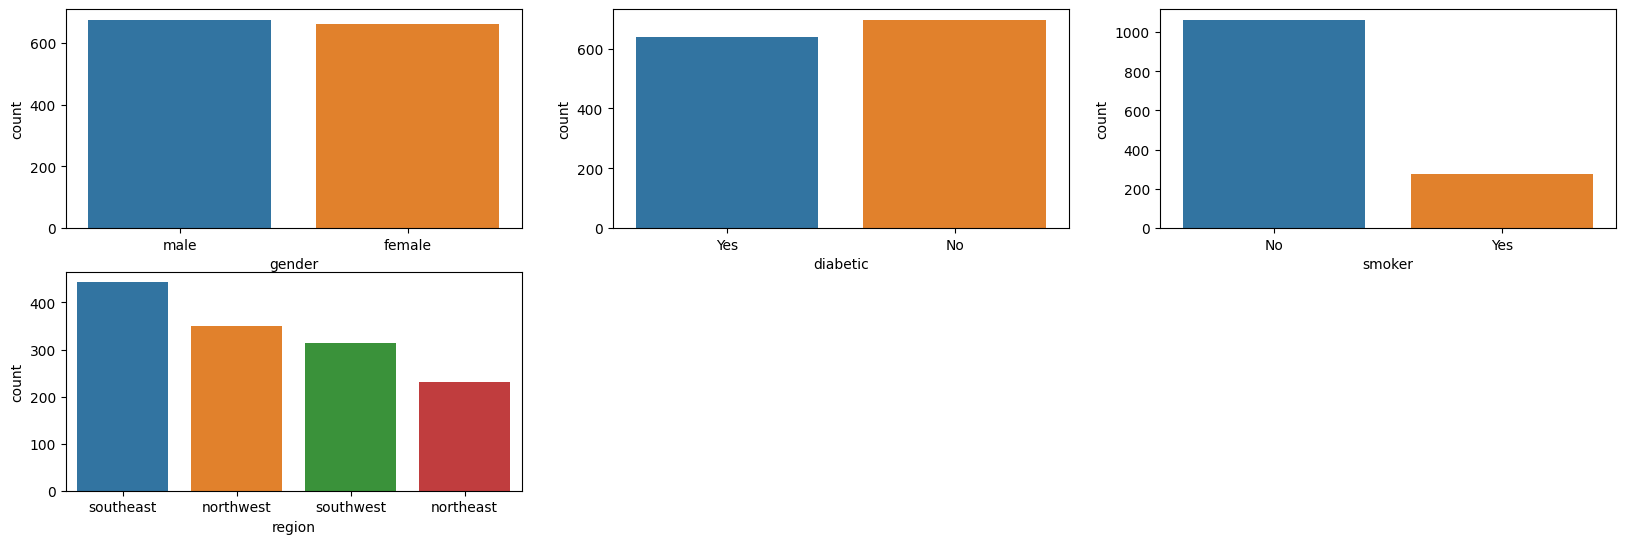

In [ ]:
def countplot_categoric(data):
  plt.figure(figsize = (20,170))
  l_row = 50
  l_pos = 1
  for col in categoric_columns:
    plt.subplot(l_row, 3, l_pos)
    sns.countplot(x=data[col])
    l_pos = l_pos + 1
  plt.tight_layout()
  return(plt.show())

countplot_categoric(df)

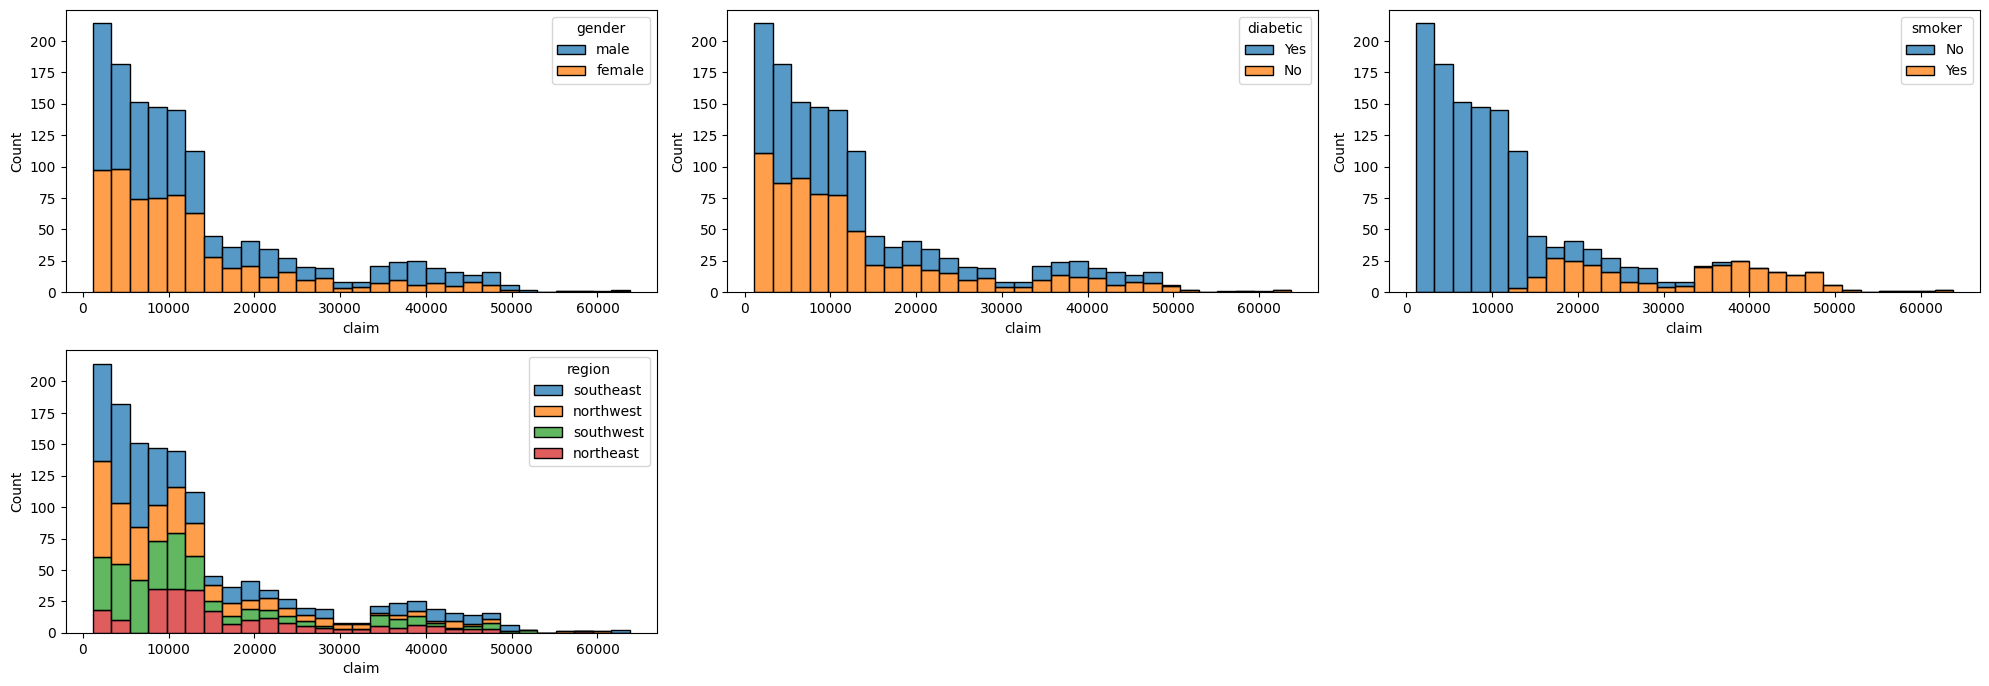

In [ ]:
plt.figure(figsize = (20,170))
l_row = 50
l_pos = 1
for col in categoric_columns:
    plt.subplot(l_row, 3, l_pos)
    sns.histplot(data=df, x="claim", hue=col, multiple="stack")
    l_pos = l_pos + 1
plt.tight_layout()
plt.show()

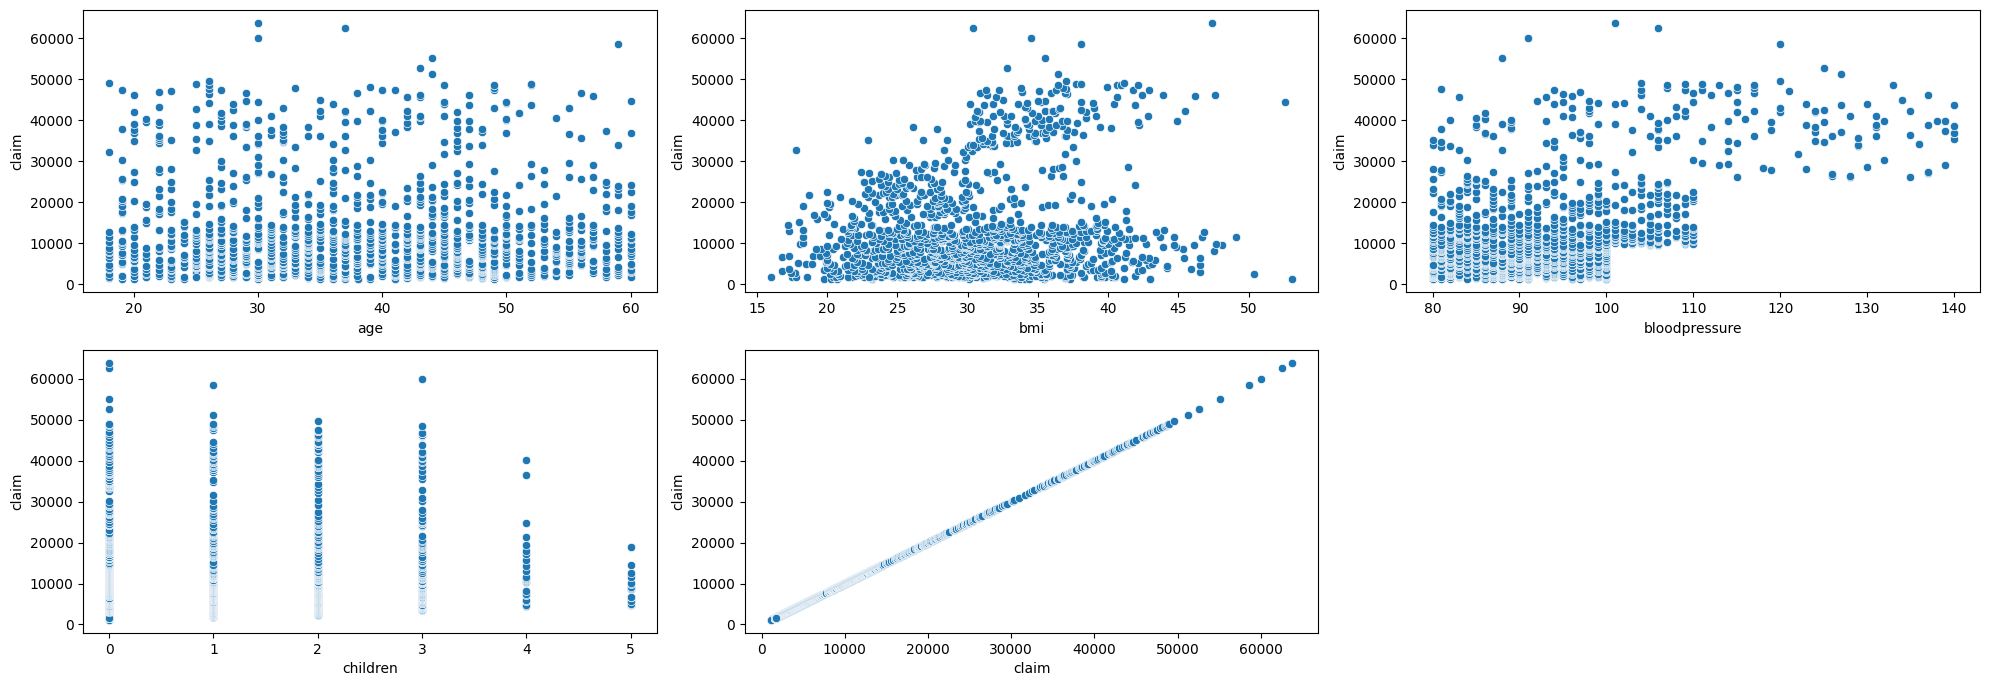

In [ ]:
def scatter_plot_numeric(data):
  plt.figure(figsize = (20,170))
  l_row = 50
  l_pos = 1
  for col in numeric_columns:
    plt.subplot(l_row, 3, l_pos)
    sns.scatterplot(data=df, x=col, y='claim')
    l_pos = l_pos + 1
  plt.tight_layout()
  return(plt.show())

scatter_plot_numeric(df)

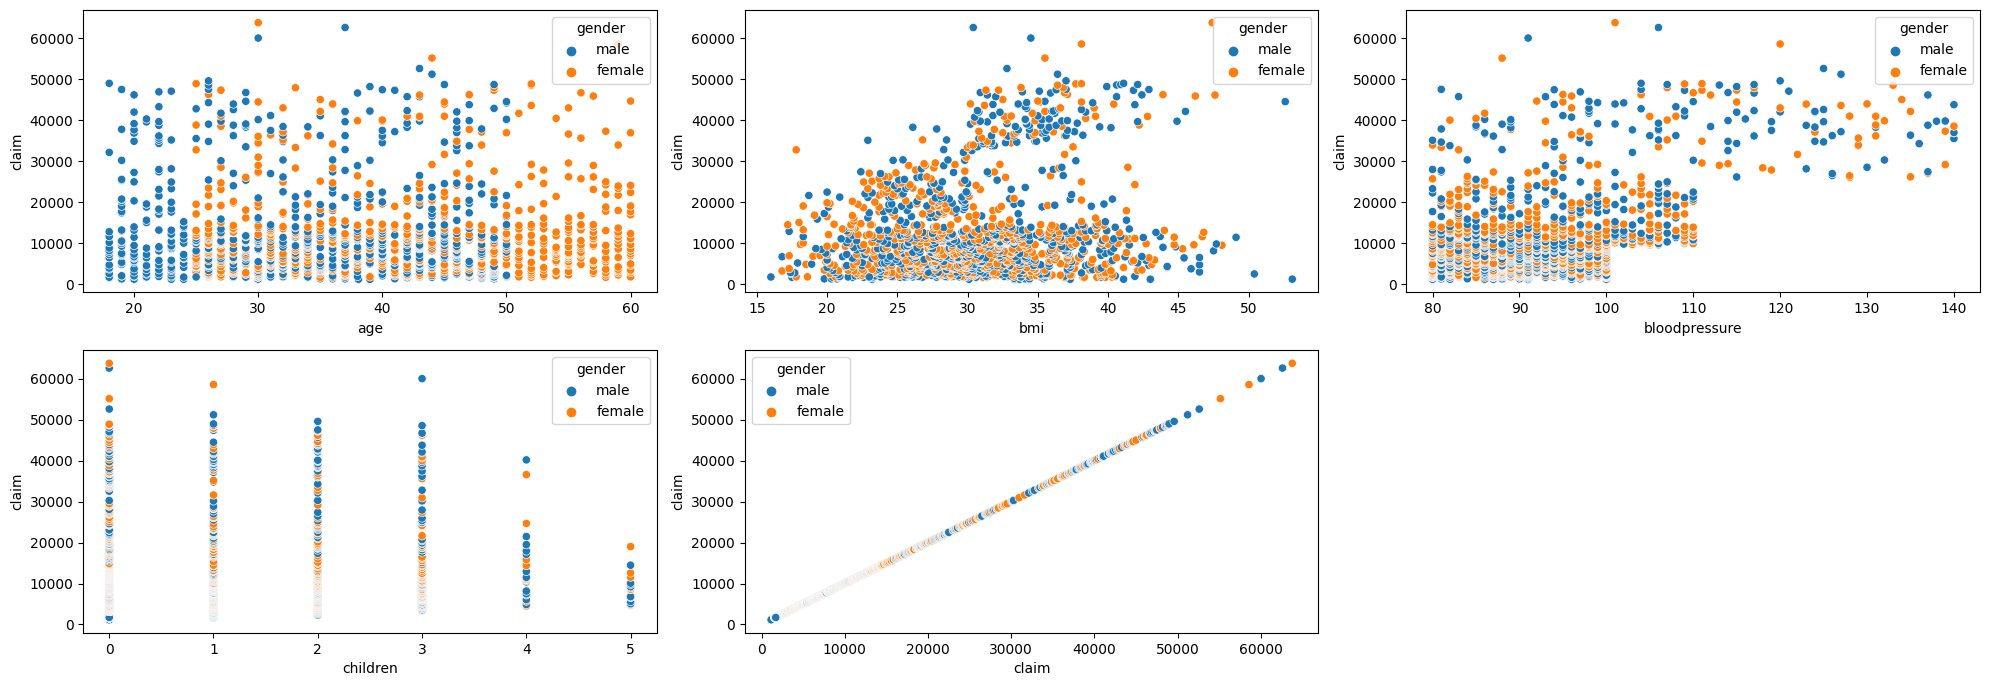

In [ ]:
def scatter_plot_numeric(data):
  plt.figure(figsize = (20,170))
  l_row = 50
  l_pos = 1
  for col in numeric_columns:
    plt.subplot(l_row, 3, l_pos)
    sns.scatterplot(data=df, x=col, hue='gender', y='claim')
    l_pos = l_pos + 1
  plt.tight_layout()
  return(plt.show())

scatter_plot_numeric(df)

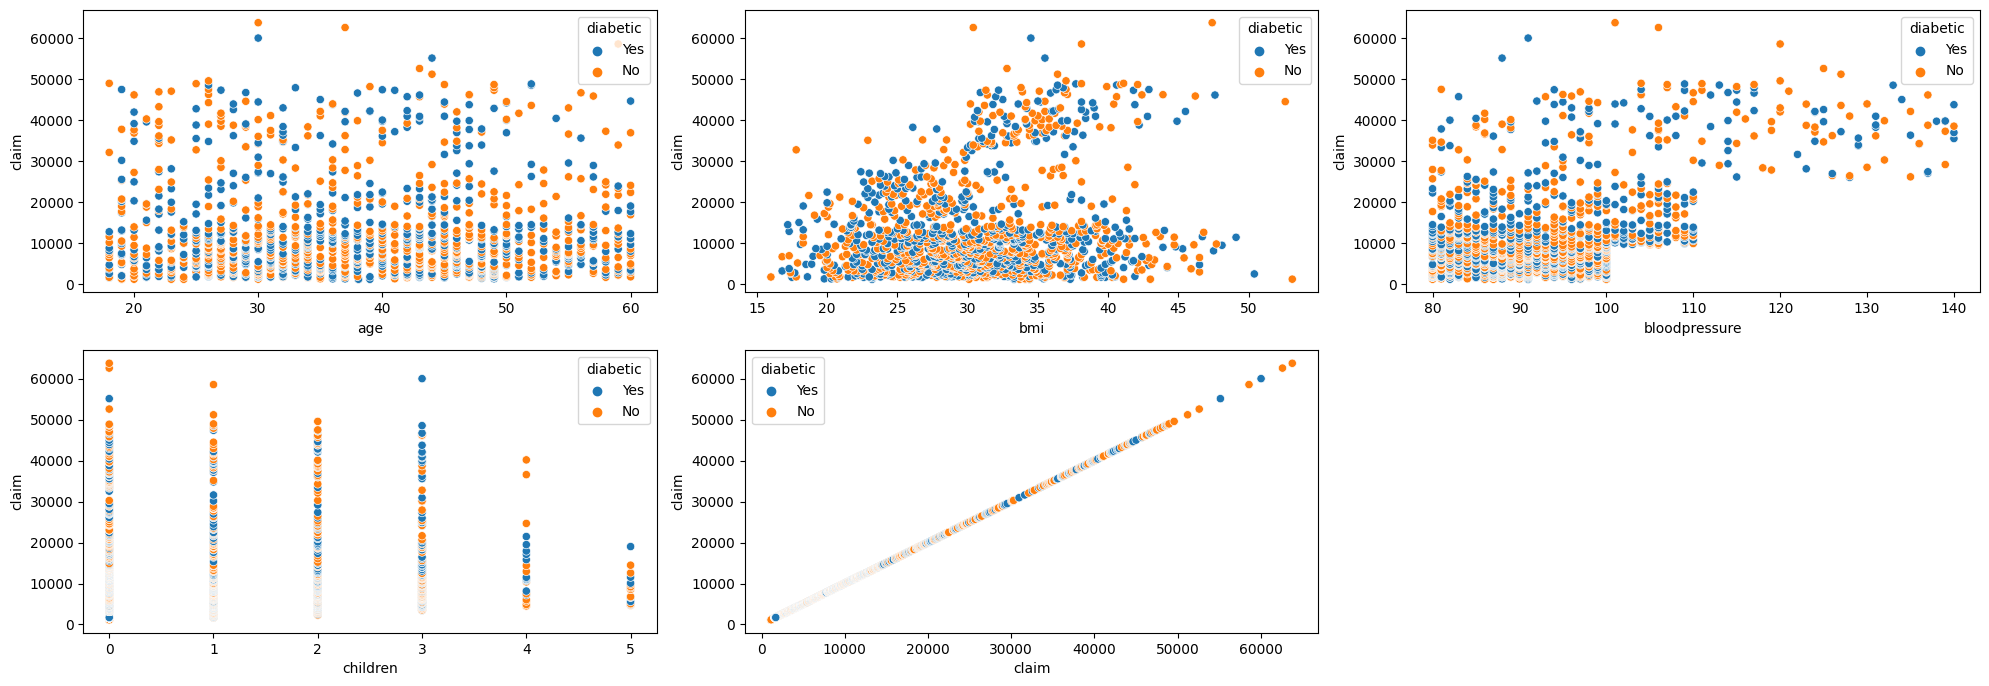

In [ ]:
def scatter_plot_numeric(data):
  plt.figure(figsize = (20,170))
  l_row = 50
  l_pos = 1
  for col in numeric_columns:
    plt.subplot(l_row, 3, l_pos)
    sns.scatterplot(data=df, x=col, hue='diabetic', y='claim')
    l_pos = l_pos + 1
  plt.tight_layout()
  return(plt.show())

scatter_plot_numeric(df)

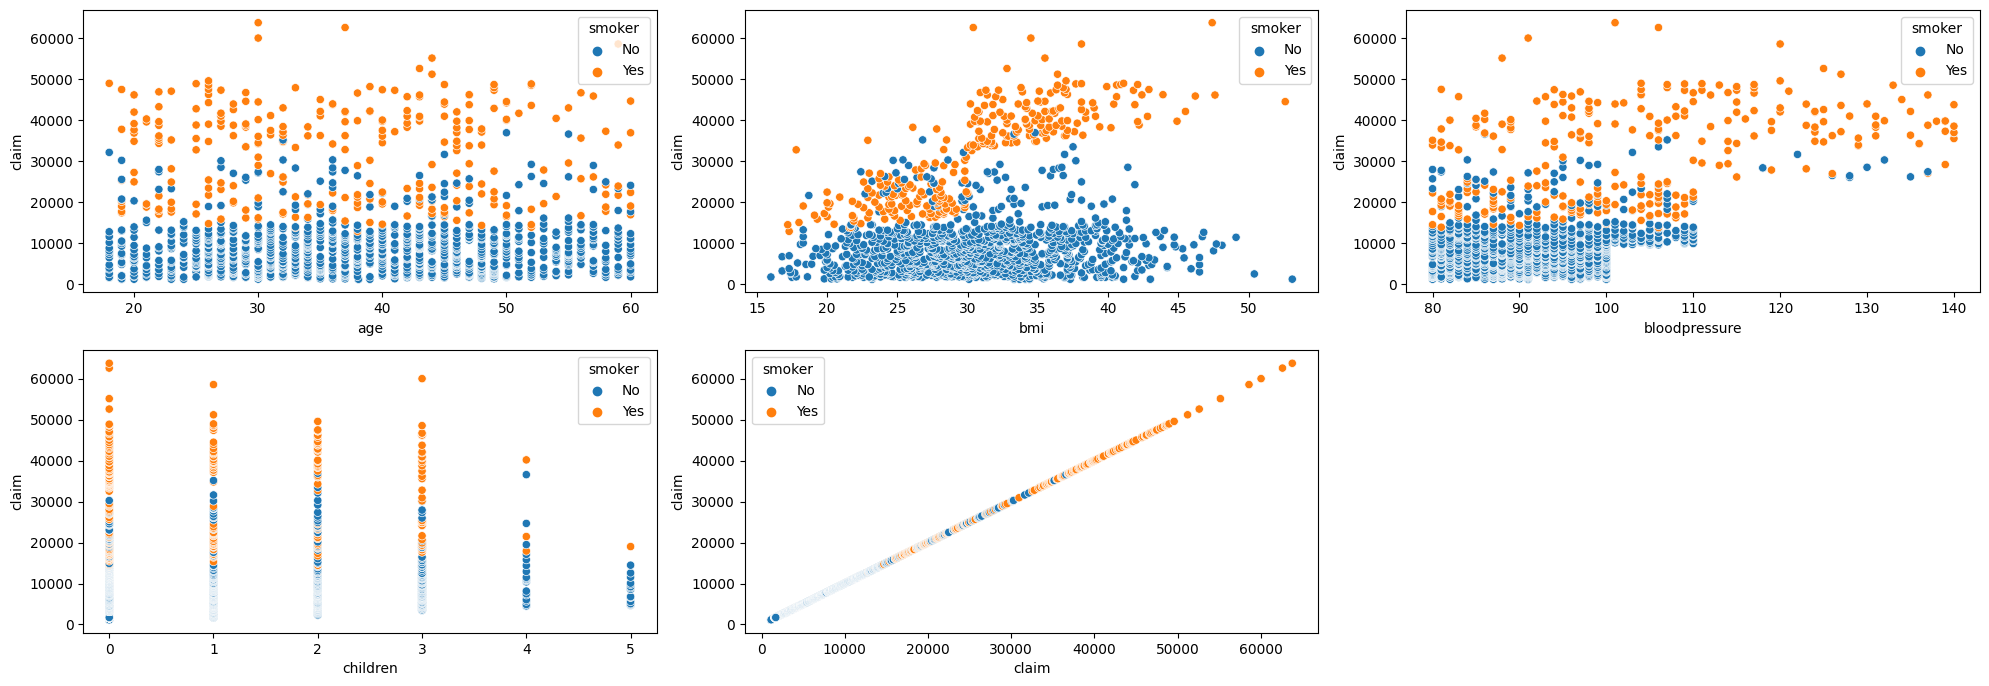

In [ ]:
def scatter_plot_numeric(data):
  plt.figure(figsize = (20,170))
  l_row = 50
  l_pos = 1
  for col in numeric_columns:
    plt.subplot(l_row, 3, l_pos)
    sns.scatterplot(data=df, x=col, hue='smoker', y='claim')
    l_pos = l_pos + 1
  plt.tight_layout()
  return(plt.show())

scatter_plot_numeric(df)

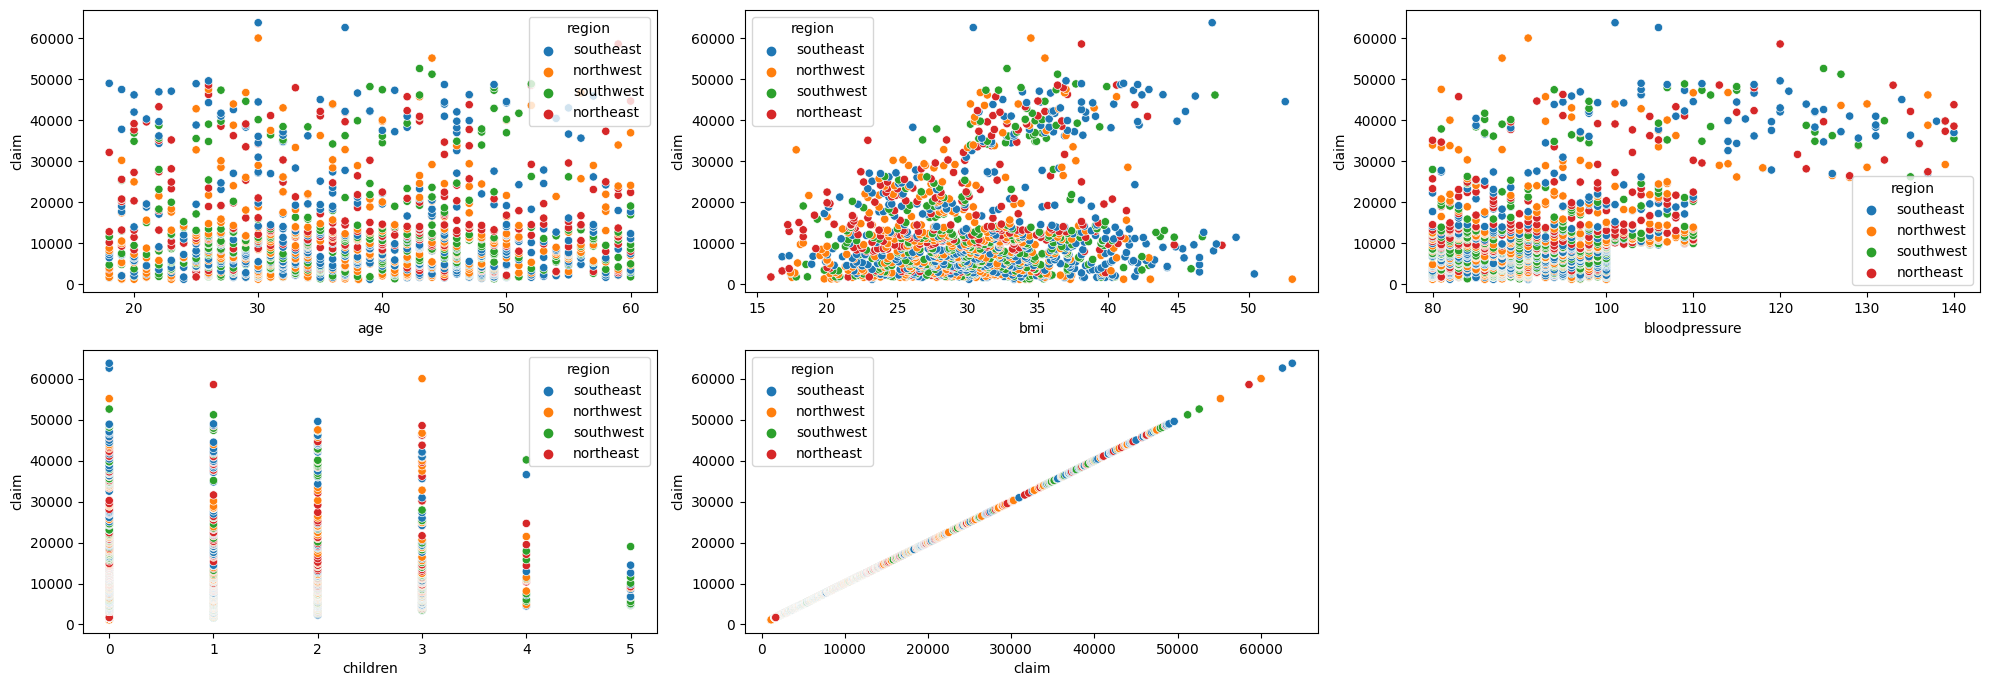

In [ ]:
def scatter_plot_numeric(data):
  plt.figure(figsize = (20,170))
  l_row = 50
  l_pos = 1
  for col in numeric_columns:
    plt.subplot(l_row, 3, l_pos)
    sns.scatterplot(data=df, x=col, hue='region', y='claim')
    l_pos = l_pos + 1
  plt.tight_layout()
  return(plt.show())

scatter_plot_numeric(df)

<ipython-input-60-46ca61571121>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap = 'coolwarm')


<Axes: >

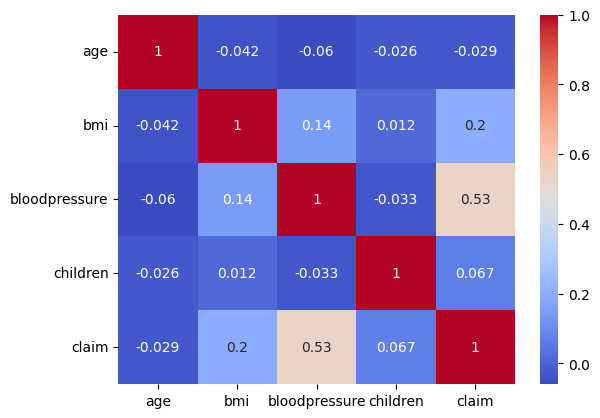

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap = 'coolwarm')

# **One Hot Encoding**

In [ ]:
categoric_columns.columns

Index(['gender', 'diabetic', 'smoker', 'region'], dtype='object')

In [ ]:
categoric_feature_list = categoric_columns.columns.tolist()
categoric_feature_list

['gender', 'diabetic', 'smoker', 'region']

In [ ]:
df_final = pd.get_dummies(df)

In [ ]:
df_final.head()

,age,bmi,bloodpressure,children,claim,gender_female,gender_male,diabetic_No,diabetic_Yes,smoker_No,smoker_Yes,region_northeast,region_northwest,region_southeast,region_southwest
0,39.000000,23.2,91,0,1121.87,0,1,0,1,1,0,0,0,1,0
1,24.000000,30.1,87,0,1131.51,0,1,1,0,1,0,0,0,1,0
2,38.078652,33.3,82,0,1135.94,0,1,0,1,1,0,0,0,1,0
3,38.078652,33.7,80,0,1136.40,0,1,1,0,1,0,0,1,0,0
4,38.078652,34.1,100,0,1137.01,0,1,1,0,1,0,0,1,0,0


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1339
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1337 non-null   float64
 1   bmi               1337 non-null   float64
 2   bloodpressure     1337 non-null   int64  
 3   children          1337 non-null   int64  
 4   claim             1337 non-null   float64
 5   gender_female     1337 non-null   uint8  
 6   gender_male       1337 non-null   uint8  
 7   diabetic_No       1337 non-null   uint8  
 8   diabetic_Yes      1337 non-null   uint8  
 9   smoker_No         1337 non-null   uint8  
 10  smoker_Yes        1337 non-null   uint8  
 11  region_northeast  1337 non-null   uint8  
 12  region_northwest  1337 non-null   uint8  
 13  region_southeast  1337 non-null   uint8  
 14  region_southwest  1337 non-null   uint8  
dtypes: float64(3), int64(2), uint8(10)
memory usage: 108.0 KB


# **Splitting Training and Testing for Modelling**

In [ ]:
X = df_final.drop(['claim'], axis=1)
y = df_final['claim']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [ ]:
print("Dataset train contains:", X_train.shape[0], "rows and ", X_train.shape[1], "columns")
print("Dataset test contains:", X_test.shape[0], "rows and ", X_test.shape[1], "columns")

print("Variable target to train contains:", y_train.shape[0], "rows")
print("Variable target to test contains:", y_test.shape[0], "rows")

Dataset train contains: 1069 rows and  14 columns
Dataset test contains: 268 rows and  14 columns
Variable target to train contains: 1069 rows
Variable target to test contains: 268 rows


# **Prediction with Various Models**



**Support Vector Machine (SVM)**

In [ ]:
from sklearn import svm
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,y_train)
y_predict = model_SVR.predict(X_test)
print("R2 Score : ",r2_score(y_test,y_predict))
print("RMSE Score : ",np.sqrt(mean_squared_error(y_test,y_predict)))
print("MAE Score : ",mean_absolute_percentage_error(y_test, y_predict))

R2 Score :  -0.128008223530655
RMSE Score :  13435.25873611647
MAE Score :  1.0216005676287505


**Random Forest Regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, y_train)
y_predict = model_RFR.predict(X_test)

print("R2 Score : ",r2_score(y_test,y_predict))
print("RMSE Score : ",np.sqrt(mean_squared_error(y_test,y_predict)))
print("MAE Score : ",mean_absolute_percentage_error(y_test, y_predict))

R2 Score :  0.824384238636348
RMSE Score :  5301.168967969923
MAE Score :  0.6869075106276865


**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, y_train)
y_predict = model_LR.predict(X_test)

print("R2 Score : ",r2_score(y_test,y_predict))
print("RMSE Score : ",np.sqrt(mean_squared_error(y_test,y_predict)))
print("MAE Score : ",mean_absolute_percentage_error(y_test, y_predict))

R2 Score :  0.7178230105365937
RMSE Score :  6719.712609560818
MAE Score :  0.7625895653623852
